# Exploratory Data Analysis on Raw Data

This notebook is created to perform an exploratory data analysis on the raw weather data which is sourced from the National Oceanic and Atmospheric Administration website.

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import datetime as dt
from datetime import datetime
import plotly.plotly as py
import plotly.graph_objs as go
import os


# import the dataset in pandas dataframe

In [115]:
IPATH = os.environ['INGESTIONPATH']+"/"
dataRB=pd.read_csv(IPATH+"RawDataStaticEDA.csv", dtype='object')

## Describe the data

We can see that there are multiple columns in this dataset with many missing values. There are a total of 90 columns with one record saved for every hour of the day.

In [116]:
dataRB.describe()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,REPORTTPYE,HOURLYSKYCONDITIONS,HOURLYVISIBILITY,HOURLYPRSENTWEATHERTYPE,...,MonthlyMaxSeaLevelPressureTime,MonthlyMinSeaLevelPressureValue,MonthlyMinSeaLevelPressureDate,MonthlyMinSeaLevelPressureTime,MonthlyTotalHeatingDegreeDays,MonthlyTotalCoolingDegreeDays,MonthlyDeptFromNormalHeatingDD,MonthlyDeptFromNormalCoolingDD,MonthlyTotalSeasonToDateHeatingDD,MonthlyTotalSeasonToDateCoolingDD
count,724623,724623,724623,724623,724623,724623,724623,381699,694322,184550,...,724623,0.0,724623,724623,148,148,148,148,1,1
unique,1,1,1,1,1,724623,10,77180,157,904,...,1,0.0,1,1,131,70,112,61,1,1
top,WBAN:14739,BOSTON MA US,3.7,42.3606,-71.0097,1995-09-09 17:00:00,SAO,250,14.91,||FG:45,...,-9999,NaN,-9999,-9999,0,0,-7,0,5634.0,185.0
freq,724623,724623,724623,724623,724623,1,396501,11214,182925,31828,...,724623,NaN,724623,724623,15,66,9,64,1,1


### Date column conversion.
The Date column is converted from string to date type to perform the below analysis.

In [5]:
dataRB['DATE'] =  pd.to_datetime(dataRB['DATE'])

In [73]:

full_range = pd.date_range(dataRB['DATE'].min(), dataRB['DATE'].max())
missing_dates = full_range[~full_range.isin(dataRB['DATE'])]


In [ ]:
dataRB['DATE'].value_counts().plot(kind='bar')

# Null Analysis

Plotting and displaying the null counts of the report types and dates and also checking counts to understand the frequency of the report type

In [151]:
dataRB1=dataRB[['DATE','REPORTTPYE']]

dataRB1['year']=pd.to_datetime(dataRB1['DATE'])

In [145]:
dataRB1=dataRB[['DATE','REPORTTPYE']]
dataRB1['DATE']=pd.to_datetime(dataRB1['DATE'])


In [7]:
count=dataRB['REPORTTPYE'].value_counts()
count

SAO      396501
FM-15    178949
FM-16     37514
FM-12     35876
SY-SA     32136
SAOSP     24339
SY-MT     14754
SOD        4550
AUTO          3
SOM           1
Name: REPORTTPYE, dtype: int64

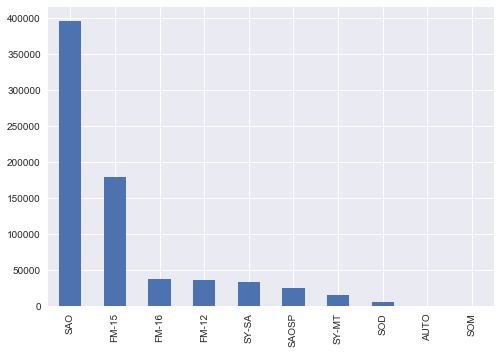

In [91]:
count.plot(kind='bar')
plt.show()

# HOURLYSKYCONDITIONS        
        

In [9]:
dataRB['HOURLYSKYCONDITIONS'].value_counts(sort=True)

250                                11214
CLR:00                             10519
FEW:02 250                          5185
OVC:08 4                            3023
OVC:08 5                            2862
50                                  2708
OVC:08 3                            2654
OVC:08 6                            2505
FEW:02 722                          2307
40                                  2241
OVC:08 8                            1968
OVC:08 7                            1965
100                                 1834
FEW:02 50                           1772
BKN:07 250                          1664
FEW:02 60                           1623
150  250                            1606
SCT:04 250                          1568
OVC:08 9                            1548
OVC:08 722                          1521
60                                  1507
BKN:06 722                          1489
30                                  1467
120                                 1395
OVC:08 10       

In [144]:
dataRB.HOURLYSKYCONDITIONS.isnull().sum()

28760

# HOURLYVISIBILITY    
## filling missing data with mean for the day to understand if we can interpolate missing values

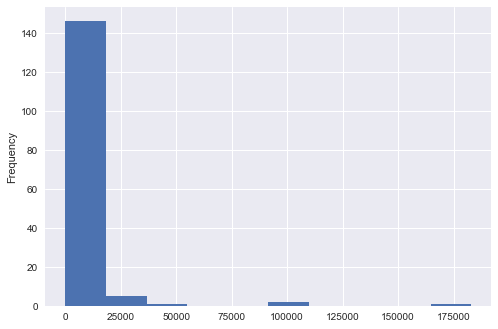

In [51]:
# value_counts                 
dataRB['HOURLYVISIBILITY'].value_counts().plot(kind='hist')
plt.show()

Plotting box plot to check distribution. We can see that the mean is getting reduced.

C:\Users\Manasi\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


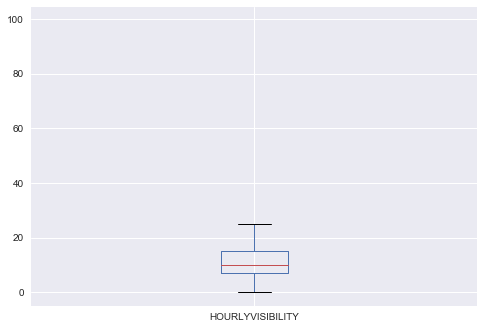

In [52]:
df=dataRB[['HOURLYVISIBILITY']].convert_objects(convert_numeric=True)# boxplot 
df.plot(kind='box')
plt.show()

Almost half of the values for Hourly Visibility are null

In [50]:
# sum of null values
dataRB.HOURLYVISIBILITY.isnull().sum()

342924

In [63]:
dataRB.HOURLYVISIBILITY.isnull().sum()

30301

# HOURLYPRSENTWEATHERTYPE              

In [148]:
dataRB['HOURLYPRSENTWEATHERTYPE'].value_counts()

BR:1 ||                                                11963
-SN:03 BR:1 |SN:71 |                                    3735
-RA:02 BR:1 |RA:61 |                                    3469
-RA:02 BR:1 |RA:61 |RA:61                               2968
-RA:02 |RA:61 |                                         2522
-RA:02 |RA:61 |RA:61                                    1552
-SN:03 |SN:71 |                                         1294
FG:2 |FG:30 |                                           1234
RA:02 BR:1 |RA:62 |RA:63                                1026
RA:02 BR:1 |RA:62 |                                     1003
HZ:7 ||HZ:05                                             542
+RA:02 BR:1 |RA:63 |                                     330
+RA:02 BR:1 |RA:63 |RA:65                                302
FG:2 |FG:30 |FG:45                                       290
SN:03 FG:2 |FG:35 SN:72 |                                205
FG:2 |FG:35 |                                            177
FG:2 |FG:30 |FG:44      

In [48]:

dataRB.HOURLYPRSENTWEATHERTYPE.isnull().sum()

540073

  # HOURLYDRYBULBTEMPF 

## Findings and cleaning: 
* column has character values, null values and * character values which needs to be cleaned 
* missing values can be calculated by Deg to F formula.
* 


In [40]:
# number of values 
dataRB['HOURLYDRYBULBTEMPF'].count()

695837

In [7]:
# number of null values 
dataRB.HOURLYDRYBULBTEMPF.isnull().sum()

28786

In [152]:
# unique values: contains * and character values.
dataRB.HOURLYDRYBULBTEMPF.unique()

array(['57', '56', '55', '54', '58', '59', '61', '65', '67', '68', '72',
       '70', '66', '63', '51', '50', nan, '47', '48', '46', '60', '64',
       '71', '73', '69', '53', '62', '74', '76', '77', '79', '80', '78',
       '75', '81', '82', '83', '84', '86', '89', '85', '88', '90', '87',
       '91', '92', '94', '95', '52', '49', '73s', '45', '96', '93', '43',
       '44', '40', '41', '42', '39', '37', '38', '35', '36', '34', '55s',
       '33', '80s', '32', '31', '54s', '29', '28', '30', '26', '25', '24',
       '22', '23', '27', '21', '20', '19', '18', '17', '16', '15', '10',
       '9', '13', '14', '12', '11', '8', '3', '4', '2', '7', '6', '5',
       '-1', '1', '76s', '72s', '97', '98', '82s', '63s', '62s', '28s',
       '-3', '-5', '-8', '-9', '-7', '0', '-4', '-6', '27s', '25s', '81s',
       '61s', '50s', '48s', '69s', '68s', '99', '100', '60s', '65s', '-2',
       '*', '101', '59s', '78s', '90s', '38s', '57s', '66s', '-10', '-11',
       '-12', '32s', '64s', '-13', '79s', '83

In [35]:
#value_counts
dataRB['HOURLYDRYBULBTEMPF'].value_counts()

63     14401
64     14146
37     13950
66     13904
50     13766
39     13664
34     13659
45     13622
36     13430
70     13400
43     13338
57     13296
48     13263
54     13186
61     13168
55     13149
68     13142
40     13028
46     13024
41     12819
52     12602
65     12565
42     12492
38     12260
60     12104
67     12049
47     12030
62     11913
59     11890
69     11766
       ...  
55s        2
75s        2
76s        2
73s        2
47s        2
53s        2
66s        2
78s        2
-12        2
51s        1
72s        1
90s        1
79s        1
4s         1
64s        1
91s        1
50s        1
77s        1
74s        1
63s        1
38s        1
42s        1
43s        1
-11        1
44s        1
34s        1
59s        1
-9s        1
-10        1
3s         1
Name: HOURLYDRYBULBTEMPF, dtype: int64

Checking the distribution of HourlyDryBulbTemperature in Farenheit

In [17]:
 df=dataRB[['HOURLYDRYBULBTEMPF']].convert_objects(convert_numeric=True)

C:\Users\Manasi\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



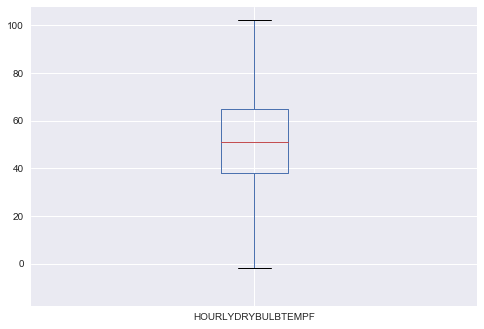

In [18]:
# boxplot 
df.plot(kind='box')
plt.show()

# HOURLYDRYBULBTEMPC            

In [42]:
dataRB['HOURLYDRYBULBTEMPC'].count()

695837

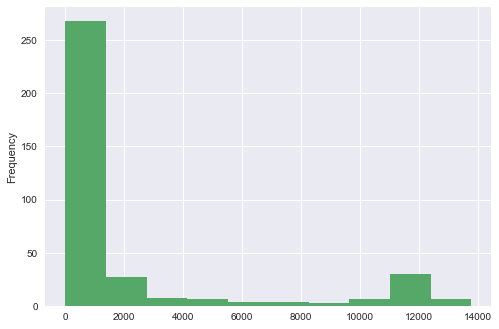

In [45]:
dataRB['HOURLYDRYBULBTEMPC'].value_counts().plot(kind='hist')
plt.show()

In [156]:
dataRB.HOURLYDRYBULBTEMPC.unique()

array(['14', '13.9', '13.3', '12.8', '12.2', '14.4', '15', '16.1', '18.3',
       '19.4', '20', '22.2', '21.1', '18.9', '17.2', '10.6', '10', nan,
       '8.3', '8.9', '7.8', '15.6', '17.8', '21.7', '22.8', '20.6', '11.7',
       '16.7', '23.3', '24.4', '25', '26.1', '26.7', '25.6', '17', '18',
       '19', '21', '22', '23', '23.9', '27', '27.2', '27.8', '28.3', '26',
       '24', '28.9', '30', '31.7', '29.4', '29', '31.1', '32', '32.2',
       '31', '28', '30.6', '32.8', '33.3', '34.4', '35', '16', '11.1',
       '9.4', '9', '13', '12', '22.8s', '7.2', '8', '11', '35.6', '33.9',
       '6.1', '6.7', '4.4', '5', '5.6', '3.9', '2.8', '3.3', '1.7', '2.2',
       '1.1', '6', '4', '2', '13.0s', '0.6', '1', '26.7s', '0', '-0.6',
       '12.0s', '-1.7', '-2.2', '-1.1', '-1', '-3.3', '-3.9', '-4.4',
       '-5.6', '-5', '-2.8', '-6.1', '-6.7', '7', '-2', '3', '-7.2',
       '-7.8', '-4', '-7', '-8.3', '-8.9', '-6', '-3', '-9.4', '-12.2',
       '-12.8', '-10.6', '-10', '-11.1', '-11.7', '-8',

In [47]:
dataRB.HOURLYDRYBULBTEMPC.isnull().sum()

28786

# HOURLYWETBULBTEMPF   : nan , '*'                

In [41]:
    
dataRB['HOURLYWETBULBTEMPF'].count()

641484

In [42]:
dataRB['HOURLYWETBULBTEMPF'].value_counts()

63     14447
62     14319
64     14065
38     14030
61     13548
65     13482
33     13309
60     13235
58     13109
55     13054
57     13014
35     12857
59     12793
40     12787
37     12742
39     12711
54     12414
32     12301
34     12248
36     12239
43     12238
46     12221
45     12052
56     12049
53     12026
48     11802
66     11702
44     11699
47     11645
51     11572
       ...  
3        318
2        295
83       282
1        201
84       176
0        164
-1       152
85        89
-3        86
-2        55
-4        53
86        46
87        33
-5        27
*         13
88        11
90        10
-6         8
-10        8
91         5
-7         5
92         4
-8         4
89         3
-9         2
93         2
-13        2
-12        1
-11        1
94         1
Name: HOURLYWETBULBTEMPF, dtype: int64

In [43]:
dataRB.HOURLYWETBULBTEMPF.unique()

array([nan, '43', '44', '48', '52', '54', '56', '55', '50', '49', '38',
       '35', '34', '32', '31', '30', '29', '26', '25', '27', '23', '21',
       '20', '19', '17', '16', '15', '14', '13', '18', '22', '24', '28',
       '37', '39', '41', '40', '33', '12', '11', '10', '9', '7', '6', '8',
       '5', '4', '3', '2', '0', '-1', '-3', '-4', '-5', '36', '47', '46',
       '45', '42', '53', '51', '59', '61', '60', '62', '58', '63', '65',
       '67', '68', '57', '66', '69', '70', '72', '74', '75', '64', '71',
       '73', '76', '78', '81', '83', '84', '80', '77', '82', '79', '1',
       '-2', '87', '86', '85', '88', '90', '91', '92', '89', '-6', '-7',
       '-8', '-10', '-11', '-13', '-12', '*', '93', '94', '-9'], dtype=object)

In [44]:
dataRB.HOURLYWETBULBTEMPF.isnull().sum()

83139

C:\Users\Manasi\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



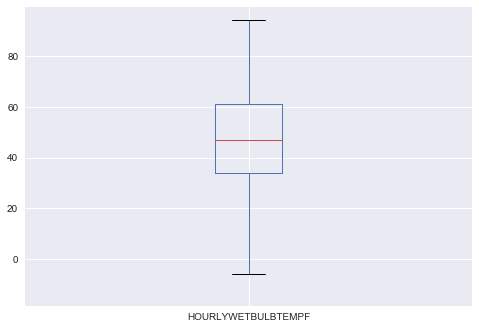

In [47]:
df=dataRB[['HOURLYWETBULBTEMPF']].convert_objects(convert_numeric=True)
# boxplot 
df.plot(kind='box')
plt.show()

# HOURLYWETBULBTEMPFC 
Plotting Hourly Wet Bulb temperature distribution

In [36]:
dataRB['HOURLYWETBULBTEMPC'].count()

641485

In [37]:
dataRB['HOURLYWETBULBTEMPC'].value_counts()

18.3     4323
15.4     3995
11.5     3994
6.1      3917
1.7      3913
16.5     3861
13.9     3856
1.2      3850
15.2     3728
7.2      3704
3.6      3626
14.9     3606
3.1      3604
3.3      3574
8        3556
2.2      3528
16.7     3525
5        3513
14.4     3475
15.9     3472
17.2     3460
8.8      3401
8.3      3362
17.4     3360
18.8     3338
15.7     3283
12.8     3247
3.9      3190
17.8     3181
18.1     3176
         ... 
-17.8       2
33.3        2
-22.8       2
33.8        2
-18.9       2
-24.9       2
-21.2       2
31.2        2
30.9        2
32          2
31.4        2
-23.9       1
31.5        1
31.7        1
-17.9       1
-18.8       1
-20.5       1
-19.4       1
32.4        1
-18.4       1
31.6        1
-18.7       1
33          1
31.3        1
34.4        1
-23.2       1
-20         1
32.2        1
-24.3       1
32.5        1
Name: HOURLYWETBULBTEMPC, dtype: int64

In [38]:
dataRB.HOURLYWETBULBTEMPC.unique()

array([nan, '6.1', '6.9', '8.9', '11.1', '12.1', '13.3', '12.8', '13.2',
       '13.5', '11.2', '9.8', '9.3', '3.5', '1.9', '1', '0.9', '0', '-0.7',
       '-1.2', '-1.6', '-3.2', '-3.3', '-3.6', '-3.9', '-3.8', '-3.4',
       '-2.9', '-3', '-4', '-5.2', '-6.1', '-6.4', '-7', '-8.4', '-8.8',
       '-8.9', '-9.4', '-9.8', '-10.3', '-10.5', '-8.5', '-7.5', '-5.7',
       '-4.2', '-3.7', '-2.8', '-2.4', '-2.6', '-2', '-1.3', '-0.4', '2.7',
       '3.4', '3.8', '3.9', '5', '4.9', '4.5', '4.2', '1.8', '0.5', '0.4',
       '-0.5', '-1.5', '-5.8', '-7.1', '-8.1', '-7.6', '-7.7', '-7.2',
       '-6.7', '-6.3', '-6.2', '-8.7', '-9.1', '-9.7', '-10.1', '-10.2',
       '-10.7', '-11.1', '-11', '-11.5', '-12', '-12.1', '-12.6', '-14',
       '-14.6', '-13.6', '-11.6', '-10.4', '-12.5', '-13.1', '-13.5',
       '-13', '-11.9', '-11.3', '-10.6', '-9.5', '-9.9', '-8.6', '-7.4',
       '-6.8', '-6.6', '-6', '-5.6', '-5.4', '-4.9', '-2.7', '-2.2',
       '-2.3', '-2.5', '-1', '-0.9', '-0.1', '0.2', '-

In [39]:
dataRB.HOURLYWETBULBTEMPC.isnull().sum()

83138

C:\Users\Manasi\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



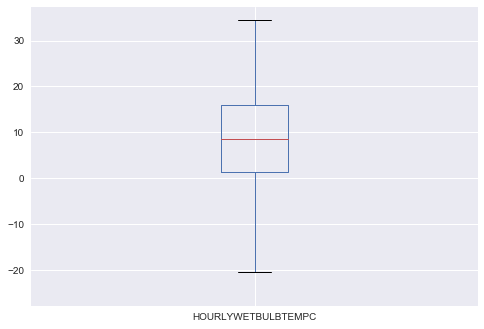

In [40]:
df=dataRB[['HOURLYWETBULBTEMPC']].convert_objects(convert_numeric=True)
# boxplot 
df.plot(kind='box')
plt.show()

# HOURLYDewPointTempF :
Analysis for HOURLYDewPointTempF

In [48]:
#count 
dataRB['HOURLYDewPointTempF'].count()

695610

In [49]:
#value counts
dataRB['HOURLYDewPointTempF'].value_counts()

57      14642
55      14226
54      14165
32      14093
61      13765
52      13542
59      13293
34      13275
50      13215
63      13175
48      13083
46      12875
45      12776
58      12727
37      12704
36      12684
56      12681
30      12661
60      12351
64      12279
43      12192
53      12110
39      11956
33      11777
51      11565
35      11539
62      11499
27      11391
31      11360
47      11281
        ...  
5s          1
-11s        1
51s         1
46s         1
10s         1
63s         1
4s          1
1s          1
57s         1
-30         1
68s         1
7s          1
42s         1
21s         1
12s         1
53s         1
-36         1
24s         1
-7s         1
60s         1
19s         1
41s         1
-9s         1
79          1
39s         1
-31         1
59s         1
70s         1
64s         1
62s         1
Name: HOURLYDewPointTempF, dtype: int64

In [50]:
# unique values
dataRB.HOURLYDewPointTempF.unique()

array(['36', '37', '34', '32', '30', '31', '33', '41', '40', '38', '26',
       '25', '23', '24', '20', '22', '21', '29', '27', '43', '42', '7',
       '5', '3', '1', '0', '-6', '4', '8', '10', '12', '13', '-9s', '-11',
       '-12', '-15', '15', '6', '11', '18', '17', '14', '16', '35', '-1',
       '-4', '-5', '-7', '-3', '-17', '-10', '-18', '-13', '-8', '39',
       '44', '46', '2', '47', '49', '52', '53', '48', '50', '45', '55',
       '56', '58', '54', '57', '51', '59', '60', '61', '62', '63', '64',
       '66', '65', '69', '75', '72', '73', '74', '-9', '-19', '-16', '-22',
       '-24', '-26', '-20', '67', '68', '70', '71', '76', '77', '35s',
       '18s', '17s', '39s', '14s', nan, '-6s', '-29', '19', '28', '-2',
       '9', '10s', '15s', '-3s', '-14', '-23', '-21', '31s', '50s', '25s',
       '26s', '23s', '55s', '-27', '-25', '-28', '-30', '13s', '19s',
       '38s', '37s', '-36', '36s', '30s', '29s', '32s', '52s', '34s',
       '-31', '0s', '43s', '40s', '49s', '48s', '53s', '

In [51]:
# number of null values not zero 
dataRB.HOURLYDewPointTempF.isnull().sum()

29013

C:\Users\Manasi\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



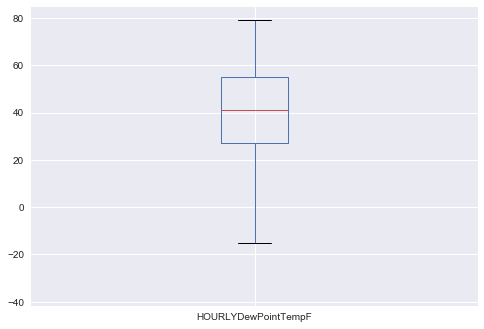

In [61]:
df=dataRB[['HOURLYDewPointTempF']].convert_objects(convert_numeric=True)
# boxplot 
df.plot(kind='box')
plt.show()

# HOURLYDewPointTempC : nan, *, character values

In [57]:
#count 
dataRB['HOURLYDewPointTempC'].count()

695610

In [53]:
#value counts
dataRB['HOURLYDewPointTempC'].value_counts()

0         14074
15        13282
10        13201
13.9      12733
14.4      12720
13.3      12670
12.8      12415
15.6      12307
12.2      12246
11.7      12091
0.6       11750
11.1      11737
1.1       11642
16.1      11552
10.6      11547
1.7       11502
16.7      11485
-0.6      11306
8.9       11292
8.3       11253
2.2       11211
2.8       11159
7.8       11053
3.3       11049
4.4       11046
7.2       11024
17.2      10969
9.4       10947
-1.1      10943
5         10820
          ...  
-8.0s         1
-2.2s         1
3.6           1
15.6s         1
7.3           1
4.7           1
-10.5         1
-15.0s        1
-2.3          1
7.0s          1
18.0s         1
0.7           1
-12.6         1
-6.3          1
16.7s         1
-27.5         1
-12.1         1
-2.9          1
22.5          1
7.9           1
-22.6s        1
-11.1s        1
-31           1
20.7          1
0.6s          1
21.5          1
26            1
-34.4         1
-25.9         1
24.1          1
Name: HOURLYDewPointTemp

In [58]:
# unique values
dataRB.HOURLYDewPointTempC.unique()

array(['2.4', '3', '1.3', '0.2', '-0.9', '-0.4', '0.8', '5.2', '4.6',
       '3.5', '-3.1', '-3.7', '-4.8', '-4.2', '-6.5', '-5.3', '-5.9',
       '-1.5', '-2.6', '6.3', '5.8', '-13.7', '-14.8', '-15.9', '-17',
       '-17.6', '-20.9', '-15.3', '-13.1', '-12', '-10.9', '-10.3',
       '-22.6s', '-23.7', '-24.2', '-25.9', '-9.2', '-14.2', '-11.5',
       '-7.6', '-8.1', '-9.8', '-8.7', '1.9', '-18.1', '-19.8', '-20.3',
       '-21.4', '-19.2', '-27', '-23.1', '-27.5', '-24.8', '-22', '4.1',
       '6.9', '8', '-16.4', '8.5', '9.6', '11.3', '11.9', '9.1', '10.2',
       '7.4', '13', '13.5', '14.6', '12.4', '14.1', '10.7', '15.2', '15.7',
       '16.3', '16.9', '17.4', '18', '19.1', '18.5', '20.7', '24.1',
       '22.4', '23', '23.5', '6.1', '6.7', '8.9', '11.1', '11.7', '12.2',
       '12.8', '13.3', '10', '1.7', '0', '-2.8', '-3.3', '-3.9', '-5',
       '-5.6', '-7.8', '-8.3', '-9.4', '-8.9', '-6.7', '-10.6', '-13.3',
       '-13.9', '-12.2', '-14.4', '-15', '-16.7', '-15.6', '-18.3',
 

In [59]:
# number of null values not zero 
dataRB.HOURLYDewPointTempF.isnull().sum()

29013

C:\Users\Manasi\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



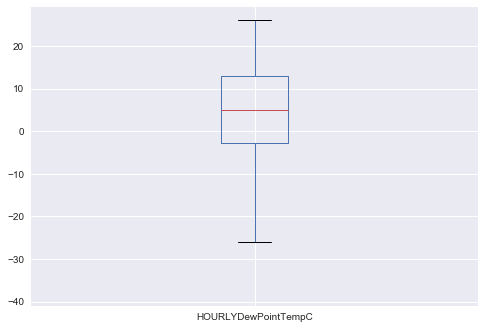

In [62]:
df=dataRB[['HOURLYDewPointTempC']].convert_objects(convert_numeric=True)
# boxplot 
df.plot(kind='box')
plt.show()

### Conclusion for temperature data
From the above distribution plots,we can see that the temperatue data is fairly normally distributed and we can come up with some type of smoothening function to fill in the missing values.

# HOURLYRelativeHumidity 

Plotting the distribution of data for humidity

In [63]:
#count 
dataRB['HOURLYRelativeHumidity'].count()

695598

In [64]:
#value counts
dataRB['HOURLYRelativeHumidity'].value_counts()

93     34400
100    27276
90     17673
96     16587
87     16200
89     13660
86     13314
84     12763
73     11985
79     11845
76     11824
61     11745
97     11571
81     11371
59     11305
66     11280
70     11115
60     10973
68     10919
55     10900
83     10896
52     10830
57     10783
56     10715
65     10625
54     10614
71     10551
64     10518
63     10376
58     10334
       ...  
27      1933
26      1768
25      1472
24      1315
23       971
22       942
21       690
20       567
19       516
18       327
17       301
16       181
15       151
14        95
13        73
95        57
12        43
98        29
99        22
11        17
*         14
10         9
9          5
104        2
8          2
101        1
102        1
6          1
7          1
103        1
Name: HOURLYRelativeHumidity, dtype: int64

In [65]:
# unique values
dataRB.HOURLYRelativeHumidity.unique()

array(['82', '93', '86', '76', '65', '58', '56', '80', '66', '71', '85',
       '79', '49', '41', '34', '31', '27', '22', '23', '26', '30', '39',
       '38', '42', '51', '61', '89', '45', '46', '63', '70', '68', '67',
       '62', '55', '83', '74', '59', '57', '36', '64', '48', '77', '84',
       '33', '29', '35', '73', '54', '32', '78', '72', '69', '60', '50',
       '40', '43', '37', '52', '53', '75', '44', '21', '28', '92', '47',
       '25', '96', '97', '100', '20', '90', '87', '81', '91', '88', '24',
       '18', '17', '94', '19', '14', '16', '15', '13', '12', '11', nan,
       '9', '10', '6', '7', '8', '95', '99', '102', '98', '104', '101',
       '103', '*'], dtype=object)

In [66]:
# number of null values not zero 
dataRB.HOURLYRelativeHumidity.isnull().sum()

29025

C:\Users\Manasi\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



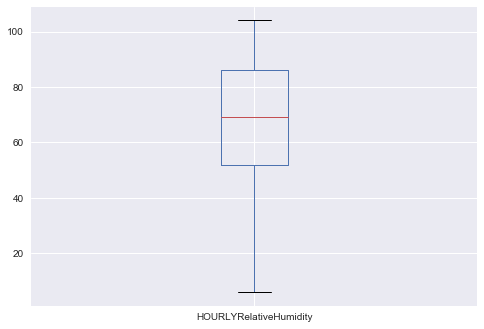

In [68]:
df=dataRB[['HOURLYRelativeHumidity']].convert_objects(convert_numeric=True)
# boxplot 
df.plot(kind='box')
plt.show()

# HOURLYWindSpeed :

We can see that there are many missing values and we will have to clean this data

In [178]:
#count 
dataRB['HOURLYWindSpeed'].count()

117266

In [179]:
#value counts
dataRB['HOURLYWindSpeed'].value_counts()

0      26070
5      11171
6      11019
3      10830
7      10184
8       8995
9       7993
10      6774
11      5634
13      4605
14      3618
15      2769
16      2146
17      1631
18      1125
20       813
21       550
22       415
23       327
24       196
25       126
26        87
28        51
29        32
30        24
31        18
32        15
33         9
10s        7
34         4
9s         3
37         3
8s         3
36         2
39         2
25s        2
40         1
31s        1
5s         1
45         1
13s        1
19         1
6s         1
44         1
7s         1
26s        1
34s        1
30s        1
3s         1
Name: HOURLYWindSpeed, dtype: int64

In [180]:
# unique values
dataRB.HOURLYWindSpeed.unique()

array(['5', '6', '0', '8', '7', '10', '9', '11', '3', nan, '13', '16',
       '14', '15', '23', '18', '24', '17', '20', '21', '25', '26', '22',
       '28', '25s', '30', '29', '3s', '26s', '31', '19', '13s', '32', '33',
       '10s', '8s', '9s', '6s', '37', '34', '31s', '34s', '7s', '39', '36',
       '45', '44', '40', '30s', '5s'], dtype=object)

In [55]:
# number of null values not zero 
dataRB.HOURLYWindSpeed.isnull().sum()

5745

C:\Users\Manasi\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



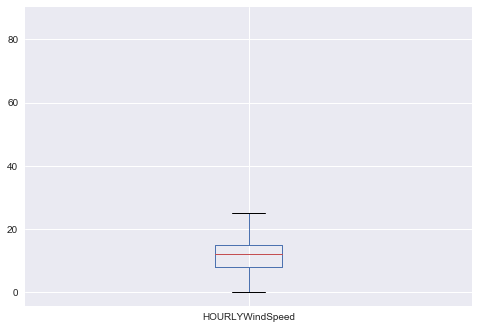

In [80]:
df=dataRB[['HOURLYWindSpeed']].convert_objects(convert_numeric=True)
# boxplot 
df.plot(kind='box')
plt.show()

# HOURLYWindDirection

We can see that this column has VRB  values where the data is variable. We will have to remove these values to make th column numeric

In [13]:
#count 
dataRB['HOURLYWindDirection'].count()

716623

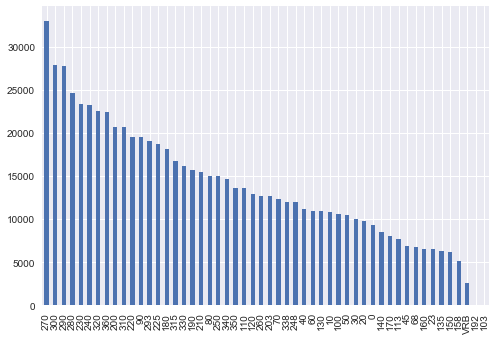

In [82]:
#value counts
dataRB['HOURLYWindDirection'].value_counts().plot(kind='bar')
plt.show()

In [15]:
# unique values
dataRB.HOURLYWindDirection.unique()

array(['315', '270', '338', '293', '360', '045', '090', '113', '068',
       '135', '248', '225', '203', nan, '023', '180', '000', '158', '230',
       '310', '030', '340', '070', '220', 'HOURLYWindDirection', '250',
       '240', '010', '050', '020', '350', '080', '110', '210', '260',
       '280', '300', '120', '150', '170', '200', '190', '290', '330',
       '140', '130', '160', '320', '040', '060', '100', 'VRB', '192', '103'], dtype=object)

In [185]:
# number of null values not zero 
dataRB.HOURLYWindDirection.isnull().sum()

4626

C:\Users\Manasi\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



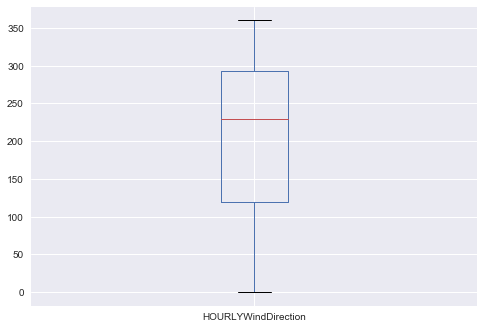

In [86]:
df=dataRB[['HOURLYWindDirection']].convert_objects(convert_numeric=True)
# boxplot 
df.plot(kind='box')
plt.show()

# HOURLYWindGustSpeed

Hourly Wind Gust Speed has * as the value for many fields. This will have to be removed and replaced with nan

In [186]:
#count 
dataRB['HOURLYWindGustSpeed'].count()

17421

In [187]:
#value counts
dataRB['HOURLYWindGustSpeed'].value_counts()

22    1820
21    1677
20    1664
23    1642
24    1465
25    1373
18    1215
26    1057
28     920
17     798
29     702
30     563
31     456
16     373
32     342
33     282
34     236
36     178
37     129
38     101
39      98
40      88
41      55
43      39
44      27
45      24
46      13
*       13
47      11
48      10
49       9
54       8
52       4
55       4
56       3
19       3
53       2
51       2
63       2
72       2
75       2
59       1
60       1
69       1
66       1
82       1
67       1
61       1
70       1
77       1
Name: HOURLYWindGustSpeed, dtype: int64

In [188]:
# unique values
dataRB.HOURLYWindGustSpeed.unique()

array([nan, '18', '20', '26', '23', '16', '17', '21', '24', '22', '25',
       '34', '29', '32', '30', '36', '28', '31', '39', '56', '43', '38',
       '33', '37', '44', '*', '41', '51', '40', '63', '72', '45', '19',
       '82', '69', '66', '48', '47', '49', '46', '75', '53', '54', '52',
       '61', '67', '59', '55', '77', '60', '70'], dtype=object)

In [189]:
# number of null values not zero 
dataRB.HOURLYWindGustSpeed.isnull().sum()

104472

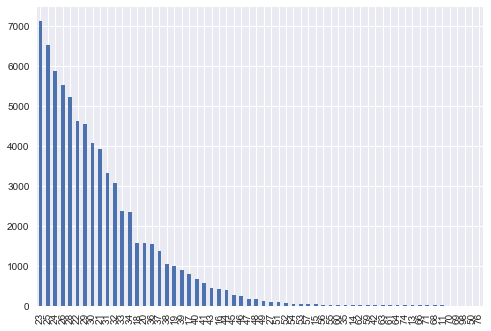

In [85]:
#value counts
dataRB['HOURLYWindGustSpeed'].value_counts().plot(kind='bar')
plt.show()

# HOURLYStationPressure
The station pressure has many missng values and also character values. We will have to clean these to make the field numeric

In [190]:
#count 
dataRB['HOURLYStationPressure'].count()

117515

In [191]:
#value counts
dataRB['HOURLYStationPressure'].value_counts()

29.78     2054
29.84     2025
29.77     2012
29.79     1984
29.76     1934
29.74     1925
29.82     1922
29.83     1922
29.75     1906
29.85     1904
29.8      1896
29.9      1884
29.87     1871
29.95     1867
29.81     1847
29.94     1834
29.93     1824
29.71     1820
29.72     1810
29.73     1798
29.91     1795
29.86     1786
29.88     1759
29.92     1742
29.89     1739
29.7      1723
29.68     1695
29.96     1677
29.69     1657
29.67     1620
          ... 
28.97s       2
28.76s       2
28.72        2
29.20s       2
28.75s       1
28.73        1
29.44s       1
29.18s       1
28.63        1
29.07s       1
28.69s       1
28.71s       1
28.96s       1
29.21s       1
29.28s       1
28.85s       1
28.83s       1
28.99s       1
28.70s       1
28.88s       1
30.67        1
29.03s       1
28.8         1
28.74s       1
29.57s       1
29.19s       1
28.81s       1
29.00s       1
28.80s       1
28.93s       1
Name: HOURLYStationPressure, dtype: int64

In [192]:
# unique values
dataRB.HOURLYStationPressure.unique()

array(['29.79', '29.78', '29.8', '29.82', '29.83', '29.84', '29.85',
       '29.87', '29.89', '29.91', '29.92', '29.93', nan, '29.94', '29.95',
       '29.96', '29.97', '29.98', '29.99', '30', '30.01', '30.03', '30.02',
       '29.88', '29.81', '29.76', '29.75', '29.74', '29.73', '29.71',
       '29.7', '29.69', '29.67', '29.66', '29.65', '29.68', '29.63',
       '29.62', '29.64', '29.6', '29.59', '29.57', '29.61', '29.72',
       '29.58', '29.56', '29.77', '29.54', '29.55', '29.53', '29.52',
       '29.86', '29.51', '29.5', '29.49', '29.48', '29.47', '29.46',
       '29.45', '30.04', '30.05', '30.06', '30.07', '30.08', '29.9',
       '29.44', '29.43', '29.42', '29.41', '30.09', '30.1', '30.11',
       '30.12', '30.15', '30.16', '30.14', '30.13', '30.18', '30.17',
       '30.19', '30.2', '30.21', '30.22', '30.23', '30.24', '30.26',
       '30.27', '30.29', '30.3', '30.31', '30.28', '30.25', '30.32',
       '30.34', '30.35', '30.37', '30.38', '30.39', '30.4', '30.36',
       '29.37', '2

In [193]:
# number of null values not zero 
dataRB.HOURLYStationPressure.isnull().sum()

4378

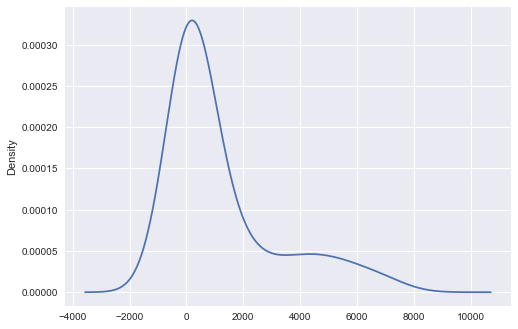

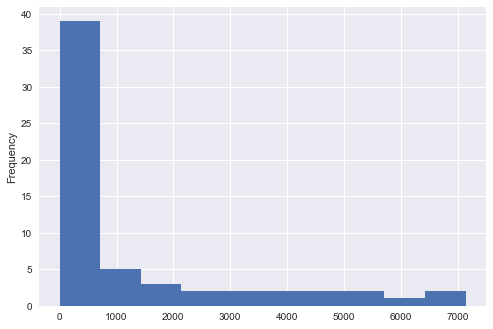

In [89]:
dataRB['HOURLYWindGustSpeed'].value_counts().plot(kind='kde')
plt.show()
dataRB['HOURLYWindGustSpeed'].value_counts().plot(kind='hist')
import matplotlib.pyplot as pltd
pltd.show()

C:\Users\Manasi\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



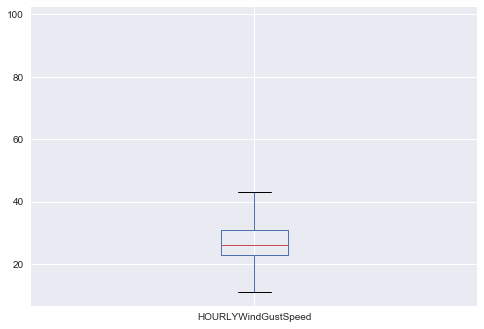

In [90]:
df=dataRB[['HOURLYWindGustSpeed']].convert_objects(convert_numeric=True)
# boxplot 
df.plot(kind='box')
plt.show()

# HOURLYPressureTendency
The hourly pressure tendency also has many missing values

In [194]:
#count 
dataRB['HOURLYPressureTendency'].count()

28986

In [195]:
#value counts
dataRB['HOURLYPressureTendency'].value_counts()

3    6872
8    6832
1    5509
6    4685
5    2153
0    2146
7     400
2     380
4       9
Name: HOURLYPressureTendency, dtype: int64

In [196]:
# unique values
dataRB.HOURLYPressureTendency.unique()

array([nan, '0', '2', '3', '1', '8', '5', '6', '7', '4'], dtype=object)

In [197]:
# number of null values not zero 
dataRB.HOURLYPressureTendency.isnull().sum()

92907

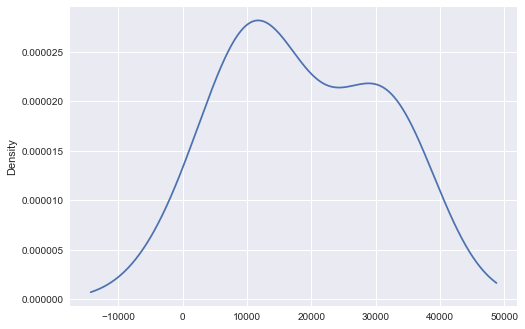

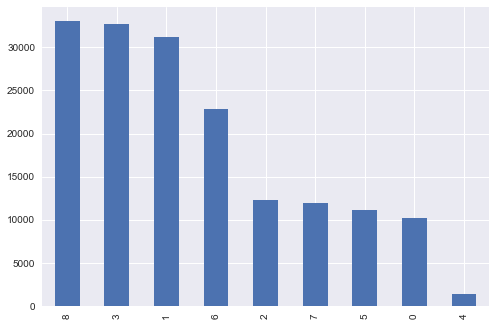

In [93]:
dataRB['HOURLYPressureTendency'].value_counts().plot(kind='kde')
plt.show()
dataRB['HOURLYPressureTendency'].value_counts().plot(kind='bar')
import matplotlib.pyplot as pltd
pltd.show()

# HOURLYPressureChange
The pressure change has missing vaues which have to be replaaced with nan

In [198]:
#count 
dataRB['HOURLYPressureChange'].count()

4462

In [199]:
#value counts
dataRB['HOURLYPressureChange'].value_counts()

-0.01    538
0.01     516
0        411
-0.02    339
0.02     323
0.04     313
-0.04    273
-0.03    262
0.03     251
-0.05    168
-0.06    162
0.05     129
0.06     120
-0.07     84
0.07      68
-0.09     62
-0.08     58
0.09      58
0.08      50
-0.1      45
0.1       27
-0.11     24
0.11      23
0.12      21
-0.13     19
0.14      18
-0.12     16
-0.14     16
0.13       9
0.15       7
0.17       7
0.19       4
-0.15      3
0.24       3
0.21       3
0.18       3
0.22       3
0.16       2
-0.19      2
-0.18      2
-0.16      2
-0.17      2
-0.26      2
0.3        1
0.2        1
-0.27      1
-0.2       1
0.29       1
0.25       1
0.27       1
-0.3       1
-0.28      1
-0.21      1
0.35       1
-0.23      1
-0.24      1
0.28       1
Name: HOURLYPressureChange, dtype: int64

In [200]:
# unique values
dataRB.HOURLYPressureChange.unique()

array([nan, '0.01', '-0.06', '-0.11', '-0.1', '-0.01', '0.09', '0.06',
       '0.11', '0.3', '-0.14', '0.04', '0.03', '-0.04', '-0.12', '-0.07',
       '0', '0.07', '-0.02', '-0.03', '-0.05', '0.05', '0.02', '0.08',
       '-0.08', '0.12', '-0.09', '0.19', '0.21', '0.15', '0.13', '0.18',
       '0.14', '0.16', '-0.13', '0.17', '0.1', '0.24', '-0.27', '-0.19',
       '-0.17', '0.22', '0.27', '-0.28', '-0.2', '0.35', '-0.15', '-0.18',
       '0.29', '-0.16', '-0.26', '-0.23', '0.2', '-0.24', '0.25', '-0.21',
       '0.28', '-0.3'], dtype=object)

In [201]:
# number of null values not zero 
dataRB.HOURLYPressureChange.isnull().sum()

117431

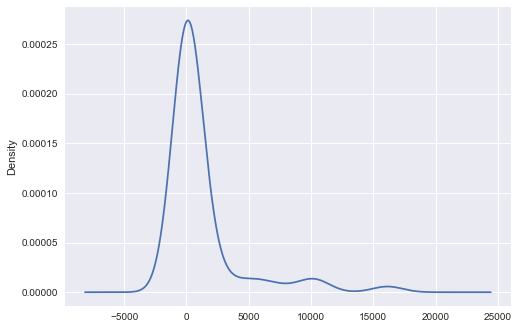

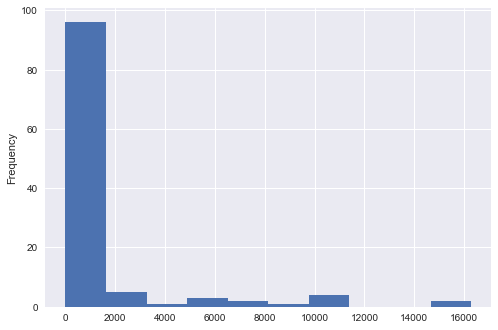

In [95]:
dataRB['HOURLYPressureChange'].value_counts().plot(kind='kde')
plt.show()
dataRB['HOURLYPressureChange'].value_counts().plot(kind='hist')
import matplotlib.pyplot as pltd
pltd.show()

C:\Users\Manasi\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



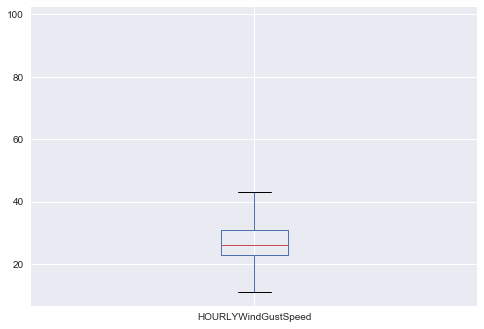

In [96]:
df=dataRB[['HOURLYWindGustSpeed']].convert_objects(convert_numeric=True)
# boxplot 
df.plot(kind='box')
plt.show()

# HOURLYSeaLevelPressure
Sea Level Pressure has missing values which have to be converted into nan

In [202]:
#count 
dataRB['HOURLYSeaLevelPressure'].count()

86790

In [203]:
#value counts
dataRB['HOURLYSeaLevelPressure'].value_counts()

30.01     1770
29.96     1760
29.99     1708
30.09     1632
30.12     1616
29.94     1614
30.04     1612
29.91     1581
30.14     1568
30.06     1566
30.17     1474
29.88     1454
30.19     1383
29.86     1345
30        1315
29.95     1278
29.97     1256
30.03     1253
30.02     1248
29.83     1236
29.93     1235
30.08     1233
29.98     1217
30.05     1213
30.13     1209
30.07     1205
29.92     1196
30.1      1186
30.11     1182
30.15     1163
          ... 
29.06        1
29.35s       1
29.13s       1
29.68s       1
29.09        1
28.95s       1
29.30s       1
29.33s       1
29.02s       1
29.76s       1
29.01s       1
29.47s       1
29.08s       1
28.93        1
29.19s       1
29.65s       1
28.96s       1
29.22s       1
29.37s       1
29.64s       1
29.04s       1
29.06s       1
28.95        1
28.92        1
28.88s       1
30.86        1
29.02        1
29.09s       1
29.26s       1
28.97        1
Name: HOURLYSeaLevelPressure, dtype: int64

In [204]:
# unique values
dataRB.HOURLYSeaLevelPressure.unique()

array([nan, '29.96', '29.97', '29.99', '30.01', '30.02', '30.03', '30.05',
       '30.07', '30.09', '30.1', '30.11', '30.12', '30.13', '30.14',
       '30.16', '30.17', '30.18', '30.19', '30.21', '30.2', '30.15',
       '30.04', '30', '29.94', '29.92', '29.91', '29.9', '29.88', '29.87',
       '29.85', '29.83', '29.86', '29.84', '29.82', '29.8', '29.81',
       '29.77', '29.76', '29.74', '29.78', '29.89', '29.75', '29.73',
       '29.79', '29.93', '29.95', '29.98', '29.71', '29.72', '29.7',
       '29.69', '30.06', '29.67', '29.68', '29.66', '29.64', '29.65',
       '29.62', '29.63', '30.22', '30.23', '30.24', '30.25', '30.26',
       '30.08', '29.6', '29.59', '29.58', '30.27', '30.28', '30.29',
       '30.3', '30.33', '30.35', '30.34', '30.32', '30.31', '30.36',
       '30.37', '30.38', '30.39', '30.4', '30.42', '30.43', '30.44',
       '30.46', '30.47', '30.49', '30.5', '30.48', '30.45', '30.51',
       '30.52', '30.53', '30.55', '30.56', '30.57', '30.58', '30.54',
       '30.59', '2

In [205]:
# number of null values not zero 
dataRB.HOURLYSeaLevelPressure.isnull().sum()

35103

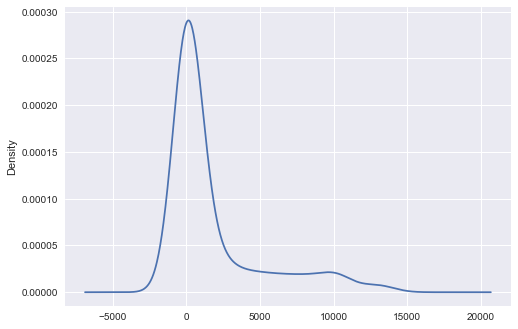

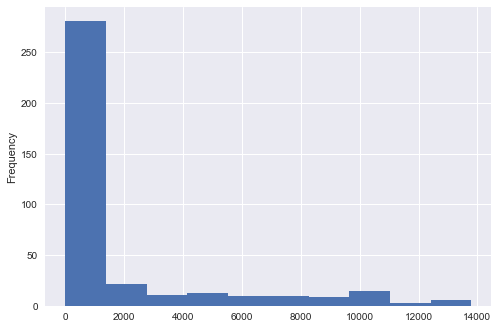

In [98]:
dataRB['HOURLYSeaLevelPressure'].value_counts().plot(kind='kde')
plt.show()
dataRB['HOURLYSeaLevelPressure'].value_counts().plot(kind='hist')
import matplotlib.pyplot as pltd
pltd.show()

# HOURLYPrecip
Hourly Preic data has T, nan, character values. T means trace amounts which acccording to standards is 0.005 . We will replace the T values with this amount and also make the field numeric

In [206]:
#count 
dataRB['HOURLYPrecip'].count()

98728

In [207]:
#value counts
dataRB['HOURLYPrecip'].value_counts()

0        73006
T        11062
0.01      5041
0.02      2178
0.03      1383
0.04       964
0.05       734
0.06       649
0.07       511
0.08       447
0.09       353
0.1        261
0.11       258
0.12       211
0.13       190
0.14       155
0.15       125
0.16       109
0.17       103
0.18        85
0.21        65
0.2         65
0.23        60
0.19        55
0.22        51
0.26        42
0.25        41
0.28        36
0.24        34
0.29        33
         ...  
0.13s        1
0.62         1
0.77         1
0.18s        1
0.83         1
0.92         1
1.08         1
0.78s        1
1.36         1
0.36s        1
0.23s        1
0.15s        1
0.85s        1
0.78         1
0.95         1
0.8          1
0.72         1
1.05         1
1.25         1
0.20s        1
0.14s        1
0.85         1
0.70s        1
0.75         1
0.81         1
0.24s        1
0.32s        1
0.19s        1
1.67         1
0.65         1
Name: HOURLYPrecip, dtype: int64

In [208]:
# unique values
dataRB.HOURLYPrecip.unique()

array(['T', '0', '0.01', nan, '0.03', '0.04', '0.02', '0.08', '0.09',
       '0.14', '0.27', '0.3', '0.38', '0.06', '0.11', '0.05', '0.07',
       '0.1', '0.16', '0.26', '0.75', '0.92', '0.12', '0.15', '0.2',
       '0.24', '0.21', '0.29', '0.39', '0.17', '0.19', '0.13', '0.18',
       '0.28', '0.34', '0.25', '0.23', '0.33', '0.41', '0.48', '0.13s',
       '0.01s', '0.31', '0.32', '0.22', '0.36', '0.78', '0.79', '0.02s',
       '0.78s', '0.35', '0.55', '0.68', '0.73', '0.74', '0.11s', '0.4',
       '0.51', '0.53', '0.6', '0.36s', '0.47', '0.77', '0.86', '0.56',
       '0.37s', '0.43', '0.44', '0.37', '0.09s', '0.57', '0.54', '0.46',
       '0.66', '0.9', '1.02', '1.05', '1.08', '1.25', '0.58', '0.61',
       '0.69', '0.63', '0.5', '0.52', '0.04s', '0.07s', '0.08s', '0.8',
       '0.18s', '0.05s', '0.59', '0.42', '0.49', '0.19s', '0.06s', '0.45',
       '0.20s', '1.36', '1.67', '0.83', '0.03s', '0.12s', '0.10s', '0.62',
       '0.23s', '0.81', '0.85', '0.65', '0.70s', '0.14s', '0.32s', 

In [209]:
# number of null values not zero 
dataRB.HOURLYSeaLevelPressure.isnull().sum()

35103

C:\Users\Manasi\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



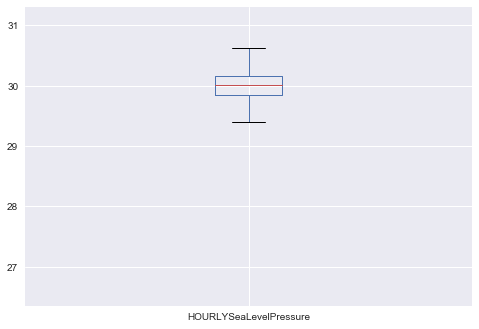

In [99]:
df=dataRB[['HOURLYSeaLevelPressure']].convert_objects(convert_numeric=True)
# boxplot 
df.plot(kind='box')
plt.show()

# HOURLYAltimeterSetting
The altimeter setting also has many nan values which will have to be remoed

In [210]:
#count 
dataRB['HOURLYAltimeterSetting'].count()

117977

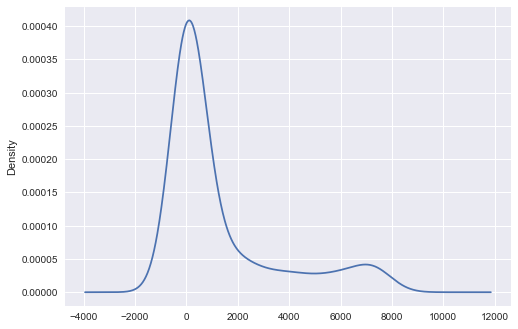

In [103]:
#value counts
dataRB['HOURLYAltimeterSetting'].value_counts().plot(kind='kde')
plt.show()

In [212]:
# unique values
dataRB.HOURLYAltimeterSetting.unique()

array(['29.93', '29.92', '29.94', '29.96', '29.97', '29.98', '29.99',
       '30.01', '30.03', '30.05', '30.06', '30.07', nan, '30.08', '30.09',
       '30.1', '30.11', '30.12', '30.13', '30.14', '30.15', '30.17',
       '30.16', '30.02', '29.95', '29.9', '29.89', '29.88', '29.87',
       '29.85', '29.84', '29.83', '29.81', '29.8', '29.79', '29.82',
       '29.77', '29.76', '29.78', '29.74', '29.73', '29.71', '29.75',
       '29.86', '29.72', '29.7', '29.91', '29.68', '29.69', '29.67',
       '29.66', '30', '29.65', '29.64', '29.63', '29.62', '29.61', '29.6',
       '29.59', '30.18', '30.19', '30.2', '30.21', '30.22', '30.04',
       '29.58', '29.57', '29.56', '29.55', '30.23', '30.24', '30.25',
       '30.26', '30.29', '30.3', '30.28', '30.27', '30.32', '30.31',
       '30.33', '30.34', '30.35', '30.36', '30.37', '30.38', '30.4',
       '30.41', '30.43', '30.44', '30.45', '30.42', '30.39', '30.47',
       '30.48', '30.49', '30.51', '30.52', '30.53', '30.54', '30.5',
       '30.55', '3

In [213]:
# number of null values not zero 
dataRB.HOURLYAltimeterSetting.isnull().sum()

3916

C:\Users\Manasi\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



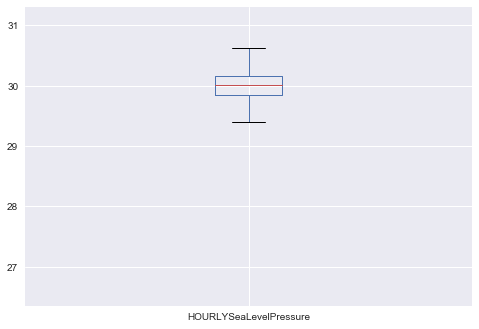

In [104]:
df=dataRB[['HOURLYSeaLevelPressure']].convert_objects(convert_numeric=True)
# boxplot 
df.plot(kind='box')
plt.show()

In [90]:
datac=dataRB[['HOURLYDRYBULBTEMPF','HOURLYWETBULBTEMPF','HOURLYDewPointTempF','HOURLYRelativeHumidity']].convert_objects(convert_numeric=True)

C:\Users\Manasi\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


# This part contains EDA on the data starting for column 26: the daily monthly summary

In [109]:
dailySummaryData=dataRB.iloc[:,26:48]
dailySummaryData.isnull().sum()


DAILYMaximumDryBulbTemp           705992
DAILYMinimumDryBulbTemp           703826
DAILYAverageDryBulbTemp           709779
DAILYDeptFromNormalAverageTemp    709790
DAILYAverageRelativeHumidity      721498
DAILYAverageDewPointTemp          721393
DAILYAverageWetBulbTemp           721393
DAILYHeatingDegreeDays            709779
DAILYCoolingDegreeDays            709779
DAILYSunrise                           0
DAILYSunset                            0
DAILYWeather                      722961
DAILYPrecip                       710725
DAILYSnowfall                     720436
DAILYSnowDepth                    717948
DAILYAverageStationPressure       720075
DAILYAverageSeaLevelPressure      721397
DAILYAverageWindSpeed             720119
DAILYPeakWindSpeed                720096
PeakWindDirection                 720096
DAILYSustainedWindSpeed           720078
DAILYSustainedWindDirection       720078
dtype: int64

## Daily summary data has most nulls as it is calculated once daily. also all the SOD values are not present and either needs to be calculated or removed from the dataset to keep the hourly data consistent

## the sunrise and sunset columns contains single value for all the rows. does not add much value

In [110]:
monthlySummaryData=dataRB.iloc[:,49:]
monthlySummaryData.isnull().sum()

MonthlyMinimumTemp                   724479
MonthlyMeanTemp                      724479
MonthlyAverageRH                     724623
MonthlyDewpointTemp                  724623
MonthlyWetBulbTemp                   724623
MonthlyAvgHeatingDegreeDays          724622
MonthlyAvgCoolingDegreeDays          724622
MonthlyStationPressure               724496
MonthlySeaLevelPressure              724496
MonthlyAverageWindSpeed              724622
MonthlyTotalSnowfall                 724137
MonthlyDeptFromNormalMaximumTemp     724476
MonthlyDeptFromNormalMinimumTemp     724479
MonthlyDeptFromNormalAverageTemp     724479
MonthlyDeptFromNormalPrecip          724493
MonthlyTotalLiquidPrecip             724493
MonthlyGreatestPrecip                724623
MonthlyGreatestPrecipDate            724623
MonthlyGreatestSnowfall              724510
MonthlyGreatestSnowfallDate          724566
MonthlyGreatestSnowDepth             724623
MonthlyGreatestSnowDepthDate         724623
MonthlyDaysWithGT90Temp         

## MonthlyMaxSeaLevelPressureDate and MonthlyMaxSeaLevelPressureTime contains single value denoted by -9999 whic equates to missing observation .          0
        